# Unsupervised learning for red wine characteristics

### Fiona Fang

## Preparation: import the red wine csv file



In [1]:
# Import Python Libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()  # for plot styling
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform # import methods from scipy
from scipy.cluster.hierarchy import dendrogram

plt.style.use('seaborn-white')


/var/folders/fn/q1_rsjk92n3232jc85ymgdpm0000gn/T/ipykernel_7692/3713885222.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Read csv file
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", 
                 sep=';')


In [4]:
# List first 5 records
df.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 1. Use K Means Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.)

In [5]:
# Scale the data
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)
X.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


### I use elbow curve and silhouette score to find the optimal number of clusters. 

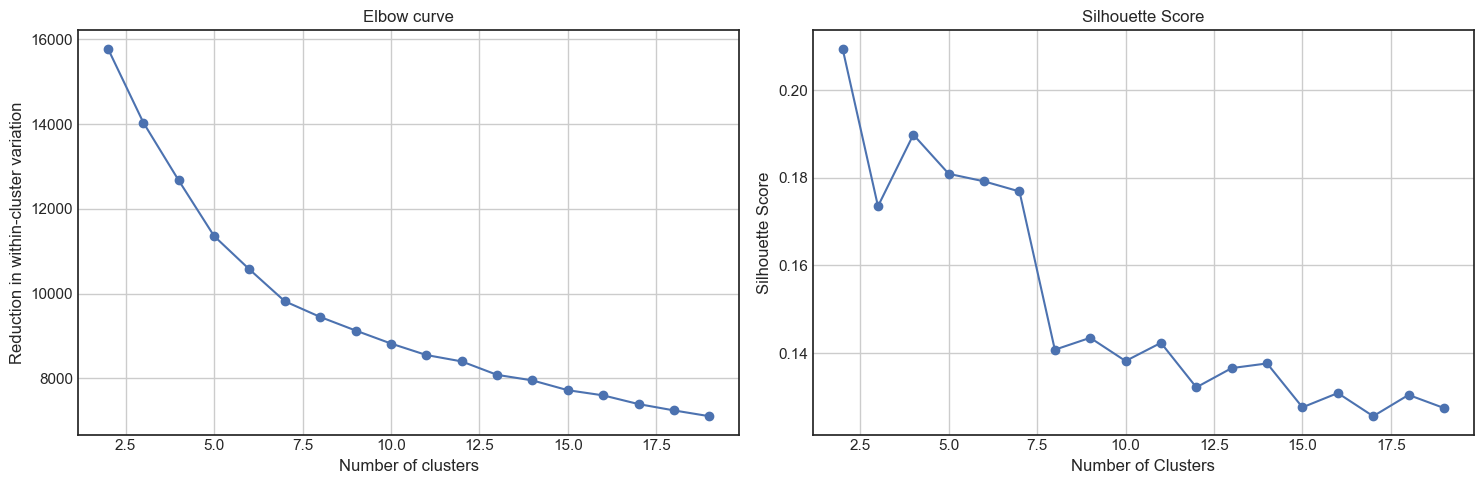

In [6]:
# Use Elbow Curve and Silhouette Score to find the optimal number of clusters
within_cluster_variance = [] 
silhouette_scores = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    within_cluster_variance.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot the Elbow Curve
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)  
plt.plot(range(2, 20), within_cluster_variance, marker='o')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Reduction in within-cluster variation')
plt.title('Elbow curve')  

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 20), silhouette_scores, marker='o')
plt.grid(True)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In elbow curve, the "elbow" point is around 6 or 7. In silhouette score, there is a significant drop after number=7.

### Therefore, I choose n_clusters=7 in the following analysis.

In [7]:
# K Mean
km = KMeans(n_clusters=7, n_init=20, random_state=42)
y_km = km.fit(X)


In [8]:
# Predict the cluster labels for each sample
predictions = km.predict(X)
print(predictions)


[3 3 3 ... 1 1 5]


In [9]:
km.labels_


array([3, 3, 3, ..., 1, 1, 5], dtype=int32)

In [10]:
pd.Series(km.labels_).value_counts()


3    485
6    337
5    261
2    252
1    201
0     34
4     29
dtype: int64

In [11]:
# Add new labels to original data
X['cluster'] = km.labels_
X.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,3
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823,3
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823,3
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848,2
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,3


In [12]:
# Cluster means for full scaled data
display(X.groupby('cluster').mean())


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,-0.085633,-0.034652,0.414856,4.961768,0.296388,1.750191,1.695832,1.225001,-0.325460,-0.023789,-0.363913,-0.022761
1,-1.075736,0.355702,-0.923442,-0.275672,-0.411516,0.262695,-0.172473,-1.324513,1.138749,-0.130590,1.162119,0.506311
2,1.649840,-0.574072,1.239628,0.116616,0.065484,-0.499587,-0.446346,1.141878,-0.982190,0.243698,-0.054849,0.131350
3,-0.426603,0.674893,-0.784266,-0.195246,-0.045938,-0.483840,-0.408476,0.014273,0.339863,-0.418837,-0.514167,-0.522211
4,0.081831,0.017955,1.144178,-0.399396,5.604731,-0.070479,0.474416,0.185803,-1.687357,3.720608,-0.882563,-0.360695
5,0.188593,-1.003985,0.715667,-0.110984,-0.270824,-0.327326,-0.536537,-0.554673,-0.203329,0.456801,0.996221,1.039336
6,-0.122608,0.025354,0.057921,-0.022058,-0.039873,0.996220,1.228121,0.205587,-0.098346,-0.173120,-0.571036,-0.420264


In [13]:
def color_gradient(val):
    color = 'red' if val > 0 else 'lightcoral'
    return f'background-color: {color}'

styled_df = X.groupby('cluster').mean().style.background_gradient(cmap='Reds')
display(styled_df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,-0.085633,-0.034652,0.414856,4.961768,0.296388,1.750191,1.695832,1.225001,-0.325460,-0.023789,-0.363913,-0.022761
1,-1.075736,0.355702,-0.923442,-0.275672,-0.411516,0.262695,-0.172473,-1.324513,1.138749,-0.130590,1.162119,0.506311
2,1.649840,-0.574072,1.239628,0.116616,0.065484,-0.499587,-0.446346,1.141878,-0.982190,0.243698,-0.054849,0.131350
3,-0.426603,0.674893,-0.784266,-0.195246,-0.045938,-0.483840,-0.408476,0.014273,0.339863,-0.418837,-0.514167,-0.522211
4,0.081831,0.017955,1.144178,-0.399396,5.604731,-0.070479,0.474416,0.185803,-1.687357,3.720608,-0.882563,-0.360695
5,0.188593,-1.003985,0.715667,-0.110984,-0.270824,-0.327326,-0.536537,-0.554673,-0.203329,0.456801,0.996221,1.039336
6,-0.122608,0.025354,0.057921,-0.022058,-0.039873,0.996220,1.228121,0.205587,-0.098346,-0.173120,-0.571036,-0.420264


### Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.

Cluster 5, 1 and 2 have higehr values of wine quality. 

Cluster 5:
*   Have higher levels of: fixed acidity, citric acid, sulphates, alcohol
*   Have lower levels of: volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH	

Cluster 1:
*   Have higher levels of: volatile acidity, free sulfur dioxide, pH, alcohol	
*   Have lower levels of: fixed acidity, citric acid, residual sugar, chlorides, total sulfur dioxide, density, sulphates

Cluster 2:
*   Have higher levels of: fixed acidity, citric acid, residual sugar, chlorides, density, sulphates, alcohol
*   Have lower levels of: volatile acidity, pH, free sulfur dioxide, total sulfur dioxide

Cluster 3, 6, and 4 have lower values of wine quality.

Cluster 3:
*   Have higher levels of: volatile acidity, density, pH	
*   Have lower levels of: fixed acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates, alcohol

Cluster 6:
*   Have higher levels of: volatile acidity, citric acid, free sulfur dioxide, total sulfur dioxide, density
*   Have lower levels of: fixed acidity, residual sugar, chlorides, pH, sulphates, alcohol

Cluster 4:
*   Have higher levels of: fixed acidity, volatile acidity, citric acid, chlorides, total sulfur dioxide, density, sulphates
*   Have lower levels of: residual sugar, free sulfur dioxide, pH, alcohol


### If you want to make a good bottle of wine, then what characteristics are most important according to this analysis?

Based on the previous analysis, I think they are important: 

1. Low volatile acidity
2. Low total sulfur dioxide
3. High alcohol
4. Extremely high or low density

In [14]:
km.cluster_centers_

array([[-0.08563321, -0.03465216,  0.41485574,  4.96176756,  0.29638789,
         1.75019116,  1.69583213,  1.22500051, -0.3254596 , -0.02378933,
        -0.363913  , -0.02276114],
       [-1.07573563,  0.35570227, -0.9234422 , -0.27567244, -0.41151592,
         0.26269473, -0.17247274, -1.32451349,  1.13874917, -0.1305897 ,
         1.16211886,  0.50631124],
       [ 1.64984034, -0.57407186,  1.23962759,  0.11661625,  0.06548436,
        -0.49958739, -0.44634616,  1.14187843, -0.98218979,  0.24369805,
        -0.05484931,  0.13134988],
       [-0.42660257,  0.67489303, -0.7842663 , -0.19524638, -0.04593752,
        -0.48383984, -0.40847577,  0.01427278,  0.33986285, -0.41883696,
        -0.51416701, -0.52221072],
       [ 0.08183134,  0.01795477,  1.14417813, -0.39939594,  5.60473128,
        -0.070479  ,  0.47441556,  0.18580277, -1.68735655,  3.72060836,
        -0.88256287, -0.36069471],
       [ 0.18859275, -1.00398517,  0.71566737, -0.11098365, -0.2708235 ,
        -0.32732638, -

In [15]:
X.groupby('cluster').groups

{0: [33, 163, 164, 274, 324, 325, 396, 400, 415, 480, 494, 501, 502, 515, 595, 649, 889, 911, 917, 923, 1043, 1071, 1074, 1079, 1081, 1235, 1244, 1434, 1435, 1474, 1476, 1558, 1574, 1589], 1: [7, 12, 45, 94, 95, 131, 132, 142, 144, 146, 173, 198, 230, 334, 346, 355, 390, 421, 425, 426, 444, 553, 569, 571, 588, 609, 695, 708, 729, 755, 756, 802, 821, 828, 829, 831, 836, 837, 855, 859, 861, 866, 867, 868, 869, 870, 871, 877, 881, 888, 895, 897, 901, 902, 903, 904, 907, 908, 916, 919, 922, 939, 958, 982, 985, 996, 997, 999, 1024, 1027, 1029, 1030, 1031, 1044, 1045, 1046, 1052, 1064, 1066, 1092, 1101, 1102, 1103, 1105, 1111, 1114, 1115, 1116, 1117, 1118, 1119, 1121, 1122, 1126, 1127, 1142, 1151, 1154, 1157, 1171, ...], 2: [3, 47, 56, 75, 76, 113, 115, 197, 205, 206, 209, 212, 241, 243, 244, 250, 252, 256, 259, 264, 265, 269, 271, 272, 277, 280, 286, 289, 292, 294, 295, 301, 305, 307, 308, 310, 326, 327, 328, 329, 330, 331, 335, 338, 339, 340, 341, 342, 343, 344, 347, 348, 350, 353, 356, 35

## 2. Use Hierarchical Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.) Use complete linkage and the same number of groups that you found to be the most meaningful in question 1



In [16]:
X = X.drop(['cluster'], axis='columns')
X.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


In [17]:
# Apply agglomerative clustering
ac = AgglomerativeClustering(n_clusters=7,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit(X)


In [18]:
labels = ac.fit_predict(X)
print(labels)


[2 2 2 ... 2 2 2]


In [19]:
pd.Series(ac.labels_).value_counts()


2    1337
0     130
1      63
5      51
6      13
4       3
3       2
dtype: int64

In [20]:
# Use Condensed distance matrix
row_clusters = linkage(pdist(X, metric='euclidean'), method='complete') 
row_clusters


array([[0.00000000e+00, 4.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [1.36000000e+02, 1.41000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.35000000e+02, 1.40000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [3.19100000e+03, 3.19200000e+03, 1.31143245e+01, 1.58100000e+03],
       [3.19300000e+03, 3.19400000e+03, 1.48474647e+01, 1.59700000e+03],
       [3.15800000e+03, 3.19500000e+03, 1.87246885e+01, 1.59900000e+03]])

In [21]:
# Add new labels to original data
X['cluster2'] = ac.labels_
X.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster2
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,2
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823,2
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823,2
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848,2
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,2


In [22]:
# cluster means for full scaled data
display(X.groupby('cluster2').mean())


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster2,,,,,,,,,,,,
0,-1.097587,0.430947,-0.721546,-0.283762,-0.402129,-0.181139,-0.185685,-1.592195,1.127159,-0.297306,1.529161,0.165001
1,0.012429,-0.100884,0.528057,-0.328215,2.707187,-0.106439,0.430325,0.260289,-1.022300,2.585018,-0.724833,-0.335609
2,0.009946,-0.002846,-0.029360,-0.042682,-0.107648,0.023370,-0.003717,0.069548,0.012269,-0.125419,-0.114821,-0.027203
3,0.074897,-0.350945,3.127368,0.043416,11.116408,0.394484,0.320274,0.770280,-2.663717,5.735193,-0.960246,-1.407158
4,-0.624115,-1.291336,1.364336,5.293553,-0.675866,3.167777,5.956069,-1.185471,-1.259873,-0.815259,1.136122,1.276629
5,2.482856,-0.657106,1.592896,0.192963,-0.056174,-0.471818,-0.452472,1.468131,-1.625762,0.646183,0.131191,0.669437
6,0.284822,-0.598039,0.630946,6.832574,0.639140,0.982981,0.505067,1.903286,-0.500635,0.115332,-0.599218,0.069719


In [23]:
def color_gradient(val):
    color = 'red' if val > 0 else 'lightcoral'
    return f'background-color: {color}'

styled_df = X.groupby('cluster2').mean().style.background_gradient(cmap='Reds')
display(styled_df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster2,,,,,,,,,,,,
0,-1.097587,0.430947,-0.721546,-0.283762,-0.402129,-0.181139,-0.185685,-1.592195,1.127159,-0.297306,1.529161,0.165001
1,0.012429,-0.100884,0.528057,-0.328215,2.707187,-0.106439,0.430325,0.260289,-1.022300,2.585018,-0.724833,-0.335609
2,0.009946,-0.002846,-0.029360,-0.042682,-0.107648,0.023370,-0.003717,0.069548,0.012269,-0.125419,-0.114821,-0.027203
3,0.074897,-0.350945,3.127368,0.043416,11.116408,0.394484,0.320274,0.770280,-2.663717,5.735193,-0.960246,-1.407158
4,-0.624115,-1.291336,1.364336,5.293553,-0.675866,3.167777,5.956069,-1.185471,-1.259873,-0.815259,1.136122,1.276629
5,2.482856,-0.657106,1.592896,0.192963,-0.056174,-0.471818,-0.452472,1.468131,-1.625762,0.646183,0.131191,0.669437
6,0.284822,-0.598039,0.630946,6.832574,0.639140,0.982981,0.505067,1.903286,-0.500635,0.115332,-0.599218,0.069719


### Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.

Cluster 4, 5 and 0 have higehr values of wine quality. 

Cluster 4:
*   Have higher levels of: citric acid, residual sugar, free sulfur dioxide, total sulfur dioxide, alcohol
*   Have lower levels of: fixed acidity, volatile acidity, chlorides, density, pH, sulphates

Cluster 5:
*   Have higher levels of: fixed acidity, citric acid, residual sugar, density, sulphates, alcohol
*   Have lower levels of: volatile acidity, chlorides, free sulfur dioxide, total sulfur dioxide, pH

Cluster 0:
*   Have higher levels of: volatile acidity, pH, alcohol
*   Have lower levels of: fixed acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, sulphates

Cluster 3, 1, and 2 have lower values of wine quality.

Cluster 3:
*   Have higher levels of: fixed acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, sulphates
*   Have lower levels of: volatile acidity, pH, alcohol

Cluster 1:
*   Have higher levels of: fixed acidity, citric acid, chlorides, total sulfur dioxide, density, sulphates
*   Have lower levels of: volatile acidity, residual sugar, free sulfur dioxide, pH, alcohol

Cluster 2:
*   Have higher levels of: fixed acidity, free sulfur dioxide, density, pH
*   Have lower levels of: volatile acidity, citric acid, residual sugar, chlorides, total sulfur dioxide, sulphates, alcohol


### If you want to make a good bottle of wine, then what characteristics are most important according to this analysis? Have your conclusions changed using Hierarchical clustering rather than k means clustering? Present any figures that assist you in your analysis

Based on the analysis, I think they are important: 

1. Low chlorides
2. High alcohol
3. Low sulphates
4. Extremely high or low density

In K means, they are important: 

1. Low volatile acidity
2. Low total sulfur dioxide
3. High alcohol
4. Extremely high or low density

Thus, my conclusions changed using Hierarchical clustering rather than k means clustering. The common characteristics are the high alcohol and the extremely high or low density.

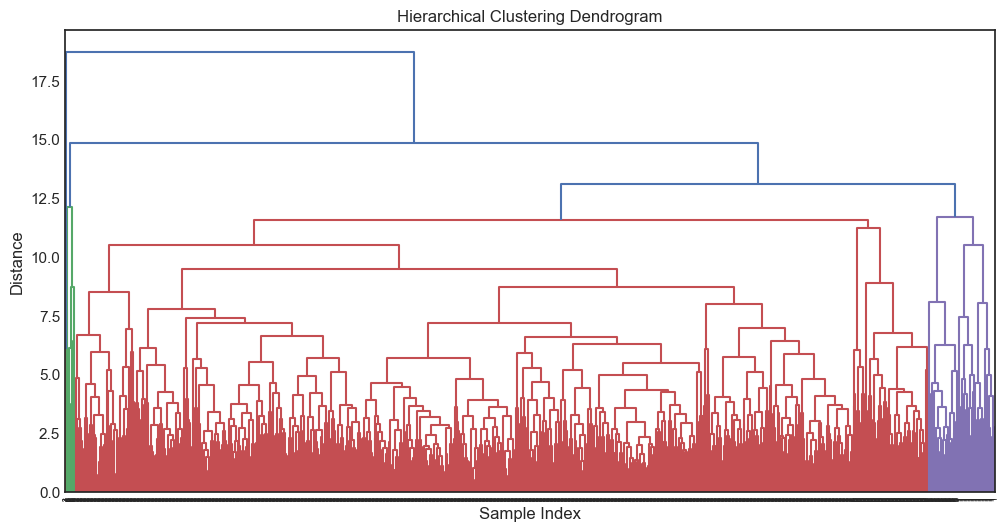

In [24]:
# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(row_clusters, labels=labels)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


## 3. Use Principal Components Analysis to reduce the dimensions of your data. How much of the variation in your data is explained by the first two principal components. How might you use the first two components to do supervised learning on some other variable tied to wine (e.g. - wine price)?


In [25]:
X = X.drop(['cluster2'], axis='columns')
X.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


In [26]:
# PCA
PCA().fit(X).components_.T


array([[ 0.48788336, -0.00417321, -0.16482854, -0.23109808, -0.07877938,
         0.0555313 , -0.30721496,  0.20052866, -0.17457815, -0.18295601,
        -0.25643792,  0.63857976],
       [-0.26512898,  0.33896786, -0.22708884,  0.04185824,  0.29937933,
         0.297287  , -0.62623369,  0.14612614, -0.06022334,  0.15510563,
         0.37716123,  0.00466168],
       [ 0.47333547, -0.1373581 ,  0.10022856, -0.0567358 , -0.12014871,
         0.13663328,  0.24414858,  0.29633271, -0.22097505,  0.34608556,
         0.62432783, -0.07003691],
       [ 0.13915442,  0.16773634,  0.24362014, -0.38303758,  0.70936319,
         0.10931059,  0.28385429, -0.17062614,  0.27818728, -0.05223656,
         0.08807787,  0.18364637],
       [ 0.19742679,  0.18978819, -0.02660785,  0.65477782,  0.26623723,
         0.33733656,  0.23054697, -0.18692254, -0.41993639, -0.00386273,
        -0.20861667,  0.05393118],
       [-0.04588071,  0.25948314,  0.61611132, -0.03371148, -0.15941286,
        -0.04264807, -

In [27]:
# Fit the PCA model and transform X to get the principal components
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(X)
reduced_data = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
print(reduced_data.head(5))


        PC1       PC2
0 -1.779442  1.157303
1 -1.004185  2.071838
2 -0.915783  1.393434
3  2.404077 -0.213792
4 -1.779442  1.157303


In [28]:
# For first two components
print("Explained Variance (First Two Components):", pca.explained_variance_[:2])
print("Explained Variance Ratio (First Two Components):", pca.explained_variance_ratio_[:2])
print("Cumulative Sum of Explained Variance Ratio (First Two Components):", np.cumsum(pca.explained_variance_ratio_[:2]))


Explained Variance (First Two Components): [3.12312087 2.24328497]
Explained Variance Ratio (First Two Components): [0.26009731 0.1868235 ]
Cumulative Sum of Explained Variance Ratio (First Two Components): [0.26009731 0.44692081]


### The first principal component (PC1) explains approximately 26.01% of the variance in the data. The second principal component (PC2) explains approximately 18.68% of the variance in the data. Together, the first two components explain about 44.69% of the total variance in the data.

In [29]:
# The loading vectors
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4','V5','V6','V7','V8','V9','V10','V11','V12'])
pca_loadings


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
fixed acidity,0.487883,-0.004173,-0.164829,-0.231098,-0.078779,0.055531,-0.307215,0.200529,-0.174578,-0.182956,-0.256438,0.638580
volatile acidity,-0.265129,0.338968,-0.227089,0.041858,0.299379,0.297287,-0.626234,0.146126,-0.060223,0.155106,0.377161,0.004662
citric acid,0.473335,-0.137358,0.100229,-0.056736,-0.120149,0.136633,0.244149,0.296333,-0.220975,0.346086,0.624328,-0.070037
residual sugar,0.139154,0.167736,0.243620,-0.383038,0.709363,0.109311,0.283854,-0.170626,0.278187,-0.052237,0.088078,0.183646
chlorides,0.197427,0.189788,-0.026608,0.654778,0.266237,0.337337,0.230547,-0.186923,-0.419936,-0.003863,-0.208617,0.053931
free sulfur dioxide,-0.045881,0.259483,0.616111,-0.033711,-0.159413,-0.042648,-0.138260,-0.019356,-0.318000,-0.585389,0.237933,-0.051922
total sulfur dioxide,0.004067,0.363971,0.540732,-0.028460,-0.218453,0.115954,-0.110209,0.089897,0.121823,0.589188,-0.355047,0.069793
density,0.370301,0.330781,-0.168723,-0.200693,0.208793,-0.425667,-0.122546,0.079500,-0.249074,0.043538,-0.231453,-0.566645
pH,-0.432721,-0.065440,0.069771,-0.005466,0.257647,-0.480354,0.185692,0.314693,-0.461916,0.207610,-0.005599,0.341230
sulphates,0.254535,-0.109334,0.212913,0.560502,0.214835,-0.403743,-0.233402,0.275492,0.452689,-0.071919,0.097637,0.067793


In [30]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'], index=X.index)
df_plot.head(5)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.779442,1.157303,-1.386581,-0.044944,0.233885,-0.976983,-0.110528,0.040320,-0.294420,0.073112,-0.262937,0.048362
1,-1.004185,2.071838,0.007759,0.466119,0.182454,0.657775,-1.376790,-0.176714,0.587342,-0.565736,0.048784,-0.139565
2,-0.915783,1.393434,-0.699286,0.345292,0.095210,0.254823,-0.720338,-0.088687,0.546495,-0.162065,-0.199140,-0.120391
3,2.404077,-0.213792,0.066381,-0.889182,-1.524742,-0.132218,0.200660,-0.202816,-0.506212,0.241135,-0.107616,0.319764
4,-1.779442,1.157303,-1.386581,-0.044944,0.233885,-0.976983,-0.110528,0.040320,-0.294420,0.073112,-0.262937,0.048362


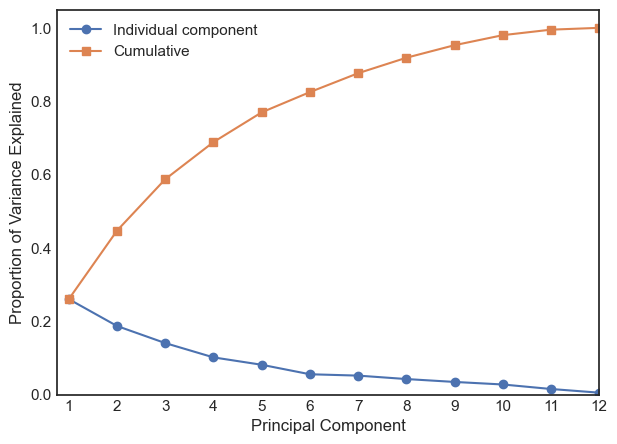

In [31]:
# Plot Proportion of Variance Explained 
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.legend(loc=2);


### How might you use the first two components to do supervised learning on some other variable tied to wine (e.g. - wine price)?

Some steps may include:

1. Create a new dataset or DataFrame with the first two principal components as features. Include the target variable of interest (e.g., wine price) in the dataset.

2. Split the dataset into training and testing sets to assess model performance. The dependent variable is wine price. 

3. Train the chosen model using the first two principal components as input features and the wine price as the target variable. Models include KNN, linear regressions, decision tree, and so on. 

4. Evaluate the model's performance on the testing set using appropriate metrics (e.g., Mean Squared Error for regression tasks, cross validation score).

5. Analyze the coefficients or feature importance of the principal components to understand their contributions to predicting wine prices.


The following code is some examples to do these: 

In [32]:
# Transform the data using the first two principal components
X_pca = pca.transform(X)[:, :2]
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])


In [33]:
# Add the target variable (e.g., wine price) to the DataFrame
# Generate random prices between 50 and 300
df_pca['price'] = np.random.uniform(50, 300, size=len(df_pca))
df_pca.head(5)


,PC1,PC2,price
0,-1.779442,1.157303,283.611607
1,-1.004185,2.071838,67.848152
2,-0.915783,1.393434,270.938306
3,2.404077,-0.213792,221.162762
4,-1.779442,1.157303,262.784844


In [34]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

y = df_pca['price']
X = df_pca.loc[:, df_pca.columns != 'price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head(5)


,PC1,PC2
493,0.270716,0.598923
354,-1.204101,-0.799511
342,2.053528,-0.695814
834,-0.506676,0.945037
705,-0.747515,2.459621


In [35]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.3f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.3f}".format(ridge.score(X_test, y_test)))

kfold = KFold()
print("Cross validation Accuracy:{:.3f}".format(np.mean(
    cross_val_score(ridge, X_train, y_train, cv=kfold))))


Training set score: 0.001
Test set score: -0.037
Cross validation Accuracy:-0.008
